In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 27.7 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122519 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os
import sys
import urllib.request
import json
import pandas  as pd

In [ ]:
df = pd.read_csv('대학백과_수원대_리뷰.csv')
df

,Unnamed: 0,0
0,0,장학금 퍼줌 등록금 입학할때만내봄 비리 있어도 학생한테 딱히 별.. 영향없음 원래 ...
1,1,나쁜교수님은 없는데 나랑 안맞는교수님은 계심 그말곤 괜찮음 학점도 하는만큼나옴 퍼주...
2,2,이 학교 오는 친구들 중 정시로 최초합으로 합격 친구들은 아쉽게 인서울 못해서 온게...
3,3,직업 전망도 좋고 아웃풋도 괜찮기는 해!
4,4,일단 학교 넓고 경상대 건물 너무너무 조아요!! 교수님들도 다들 열정적이시고 배울게...
...,...,...
469,469,NaN
470,470,우리학교는 정말 인풋대비 아웃풋이 좋은편인거같다
471,471,교수님들이 적극 학생관리를 해주십니다
472,472,NaN


In [ ]:
df.columns =['index','리뷰']

In [ ]:
del df['index']

In [ ]:
df = df.dropna()
df

,리뷰
0,장학금 퍼줌 등록금 입학할때만내봄 비리 있어도 학생한테 딱히 별.. 영향없음 원래 ...
1,나쁜교수님은 없는데 나랑 안맞는교수님은 계심 그말곤 괜찮음 학점도 하는만큼나옴 퍼주...
2,이 학교 오는 친구들 중 정시로 최초합으로 합격 친구들은 아쉽게 인서울 못해서 온게...
3,직업 전망도 좋고 아웃풋도 괜찮기는 해!
4,일단 학교 넓고 경상대 건물 너무너무 조아요!! 교수님들도 다들 열정적이시고 배울게...
...,...
465,과 자체는 배우는것도 많고 좋아요 졸업하고 자격증 딸 때 유용해요 스펙트럼이 넓거든...
466,요즘 건물을 많이 짓고있어서 ㅎㅎ 깨끗하고 편의시설도 좋습니다^^ 자격증이나 토익 ...
467,군기 같은것도 없고 교수님도 괜찮으신 분들 계세요
470,우리학교는 정말 인풋대비 아웃풋이 좋은편인거같다


In [ ]:
review_text = ''
for temp in df['리뷰']:
    review_text += str(temp)
review_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',review_text)
review_text

'장학금 퍼줌 등록금 입학할때만내봄 비리 있어도 학생한테 딱히 별   영향없음 원래 사학재단은 다 비리 있는 거 아닌가 근데 학교에 과하게 피해의식 투쟁심 불태우는애들 많음 이런애들 보면 학점도 처참함   에타끄고 사는게 마음편함 대신 여기보다 입결 낮은 협성대 강남대 순천향대 이딴애들한테 이유도없이 처맞음 본인이 수만휘나 지식인 들락날락거리는 사람이면 끊고입학하셈 부실대라 욕처먹는데 협성강남도 부실대였으며 아무리 언플해도 이게웬일   얘네가 수원대 입결을 이긴적이 없음     협수용강이라는 자297위질 들을때마다 웃음도안나옴 경상대라 시설좋음 경상은 아웃풋도   은듯 본인하는만큼 가겠지만 전과쉽고 복전도쉬움 일단 우리과는 워낙 갠플이라 똥군기 악습 이런거없음 또 뭘 말해야되지  학식은 코로나이후로 잠깐 사라졌는데 생겨도 안처먹을거같은사람들이 에타에서 주기적으로 열냄 대학주변에 맛집 카페 놀거리 다 많음 근데 뭔 시골에 지어졌다그러세요   님들 다 홍대에서 통학오심  진짜 시골에 세워진 대학 안가본듯 역에서 가까움 버스타고 10분   판교사는데 통학 1시간내외 걍 무난한대학임 3등급대 애들 들어오는 대학이고 인가경 바로 밑임 근데 진짜 피해망상 찌든애들이 스스로 지잡대라고 멘헤라되는거 꼴보기싫음    동기잘만나야됨 인터넷설카포 집단소 커뮤 끊어라  제발좀 수과대 통폐합 건은 아직도 질질끌고있는데 수과대는 수과대로졸업함 자꾸 수과대에서 수원대 특별편입된다고 구라핑끄는거 패고싶음 수과대는 폐교고 걍 수원대에서 수과대 캠퍼스까지먹겠다는거임 근데 수과대캠퍼스 교통도 개별로고 지금도 규모 작지않은데 입학정원 늘리는게 우리한테 별로좋은것같지않아서 나는반대 요약   학교는 가만히 있는데 학생들이 스스로 급을 낮춤나쁜교수님은 없는데 나랑 안맞는교수님은 계심 그말곤 괜찮음 학점도 하는만큼나옴 퍼주시는건아님 학부제라 커리큘럼 시기 타학교에 비해 좀 애매한것말곤 이것저것 전공 찍먹해볼수있어서 좋음 비대면이었던 것 때문에 선후배 관계는 모르겠는데 딱히 친해질만한 그런건없긴함 일단 

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(review_text)

print(line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('장학금', 'Noun'), ('퍼줌', 'Noun'), ('등록금', 'Noun'), ('입학', 'Noun'), ('할', 'Verb'), ('때', 'Noun'), ('만', 'Josa'), ('내', 'Determiner'), ('봄', 'Noun'), ('비리', 'Noun'), ('있어도', 'Adjective'), ('학생', 'Noun'), ('한테', 'Josa'), ('딱히', 'Adjective'), ('별', 'Noun'), ('영향', 'Noun'), ('없음', 'Adjective'), ('원래', 'Noun'), ('사학', 'Noun'), ('재단', 'Noun'), ('은', 'Josa'), ('다', 'Adverb'), ('비리', 'Noun'), ('있는', 'Adjective'), ('거', 'Noun'), ('아닌가', 'Adjective'), ('근데', 'Adverb'), ('학교', 'Noun'), ('에', 'Josa'), ('과', 'Noun'), ('하게', 'Verb'), ('피해', 'Noun'), ('의식', 'Noun'), ('투쟁', 'Noun'), ('심', 'Noun'), ('불', 'Noun'), ('태우는', 'Verb'), ('애', 'Noun'), ('들', 'Suffix'), ('많음', 'Adjective'), ('이런', 'Modifier'), ('애', 'Noun'), ('들', 'Suffix'), ('보면', 'Verb'), ('학점', 'Noun'), ('도', 'Josa'), ('처참함', 'Adjective'), ('에타', 'Noun'), ('끄고', 'Verb'), ('사는게', 'Verb'), ('마음', 'Noun'), ('편함', 'Adjective'), ('대신', 'Noun'), ('여기', 'Noun'), ('보다', 'Josa'), ('입결', 'Noun'), ('낮은', 'Adjective'), ('협성대', 'Noun'), ('강남대', 'Noun'), (

In [ ]:
#제외할 단어 추가
stop_words = "수원대 학교" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('교수', 141),
 ('학과', 81),
 ('건물', 79),
 ('생각', 77),
 ('수업', 67),
 ('취업', 61),
 ('학년', 57),
 ('시설', 52),
 ('좋은', 47),
 ('진짜', 43),
 ('사람', 41),
 ('장점', 41),
 ('편이', 40),
 ('있는', 39),
 ('전공', 39),
 ('좋아요', 39),
 ('추천', 39),
 ('선배', 38),
 ('우리', 35),
 ('캠퍼스', 34),
 ('단점', 34),
 ('공부', 32),
 ('학점', 31),
 ('장학금', 29),
 ('열정', 29),
 ('비리', 28),
 ('없고', 28),
 ('영어', 28),
 ('정도', 28),
 ('정말', 28),
 ('커리큘럼', 27),
 ('대한', 27),
 ('나름', 27),
 ('많고', 27),
 ('자격증', 27),
 ('군기', 25),
 ('있고', 25),
 ('없다', 25),
 ('교통', 24),
 ('있어서', 24),
 ('자체', 24),
 ('많다', 24),
 ('학생', 23),
 ('좋음', 23),
 ('졸업', 23),
 ('별로', 23),
 ('분위기', 23),
 ('지원', 23),
 ('학부', 22),
 ('없음', 21),
 ('때문', 21),
 ('총장', 21),
 ('복수', 21),
 ('아웃', 20),
 ('선후배', 20),
 ('도움', 20),
 ('오지', 20),
 ('매우', 19),
 ('좋습니다', 19),
 ('많음', 18),
 ('타고', 18),
 ('아닌', 18),
 ('다른', 18),
 ('넓다', 18),
 ('많아서', 17),
 ('교양', 17),
 ('있다', 17),
 ('있지만', 17),
 ('교류', 17),
 ('문제', 17),
 ('대신', 16),
 ('본인', 16),
 ('버스', 16),
 ('편입', 16),
 ('넓고', 16),
 ('미래', 16)

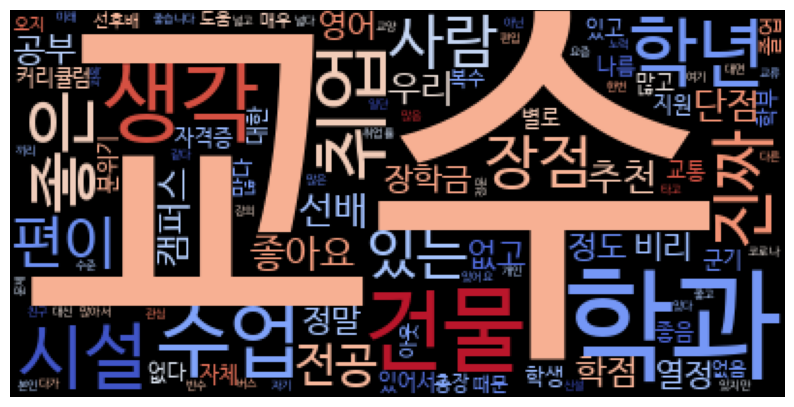

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('대학백과_수원대_리뷰_워드클라우드.png', bbox_inches='tight')
plt.show()

In [ ]:
# 워드클라우드 복붙
wordcloud_1 = str(tags)
wordcloud_1 = wordcloud_1.replace("'",' ')
wordcloud_1

'[( 교수 , 141), ( 학과 , 81), ( 건물 , 79), ( 생각 , 77), ( 수업 , 67), ( 취업 , 61), ( 학년 , 57), ( 시설 , 52), ( 좋은 , 47), ( 진짜 , 43), ( 사람 , 41), ( 장점 , 41), ( 편이 , 40), ( 있는 , 39), ( 전공 , 39), ( 좋아요 , 39), ( 추천 , 39), ( 선배 , 38), ( 우리 , 35), ( 캠퍼스 , 34), ( 단점 , 34), ( 공부 , 32), ( 학점 , 31), ( 장학금 , 29), ( 열정 , 29), ( 비리 , 28), ( 없고 , 28), ( 영어 , 28), ( 정도 , 28), ( 정말 , 28), ( 커리큘럼 , 27), ( 대한 , 27), ( 나름 , 27), ( 많고 , 27), ( 자격증 , 27), ( 군기 , 25), ( 있고 , 25), ( 없다 , 25), ( 교통 , 24), ( 있어서 , 24), ( 자체 , 24), ( 많다 , 24), ( 학생 , 23), ( 좋음 , 23), ( 졸업 , 23), ( 별로 , 23), ( 분위기 , 23), ( 지원 , 23), ( 학부 , 22), ( 없음 , 21), ( 때문 , 21), ( 총장 , 21), ( 복수 , 21), ( 아웃 , 20), ( 선후배 , 20), ( 도움 , 20), ( 오지 , 20), ( 매우 , 19), ( 좋습니다 , 19), ( 많음 , 18), ( 타고 , 18), ( 아닌 , 18), ( 다른 , 18), ( 넓다 , 18), ( 많아서 , 17), ( 교양 , 17), ( 있다 , 17), ( 있지만 , 17), ( 교류 , 17), ( 문제 , 17), ( 대신 , 16), ( 본인 , 16), ( 버스 , 16), ( 편입 , 16), ( 넓고 , 16), ( 미래 , 16), ( 있어요 , 16), ( 다가 , 16), ( 요즘 , 16), ( 취업률 , 16), ( 친구 , 15), ( 개인 , 15)